In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib as mpl

In [2]:
from IPython.display import Image, display

In [3]:
mpl.rcParams['figure.figsize'] = (18,8)
mpl.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df[['date','T_out','RH_2','Appliances','lights']]

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40
...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,42.025714,100,0
19731,2016-05-27 17:30:00,22.600000,42.080000,90,0
19732,2016-05-27 17:40:00,22.466667,42.768571,270,10
19733,2016-05-27 17:50:00,22.333333,43.036000,420,10


In [8]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

C:\Users\thaku\AppData\Local\Temp\ipykernel_2796\2375640763.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)


In [9]:
df.head()
# every 10 min we have updated data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df[['date','T_out','RH_2','Appliances','lights']]

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40
...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,42.025714,100,0
19731,2016-05-27 17:30:00,22.600000,42.080000,90,0
19732,2016-05-27 17:40:00,22.466667,42.768571,270,10
19733,2016-05-27 17:50:00,22.333333,43.036000,420,10


In [11]:
## t_out is the outside temp 
## rh_2 is the outside humidity nand appliance useage is the c olumn we are gonna predict


In [12]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

C:\Users\thaku\AppData\Local\Temp\ipykernel_2796\2375640763.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)


<Axes: xlabel='date'>

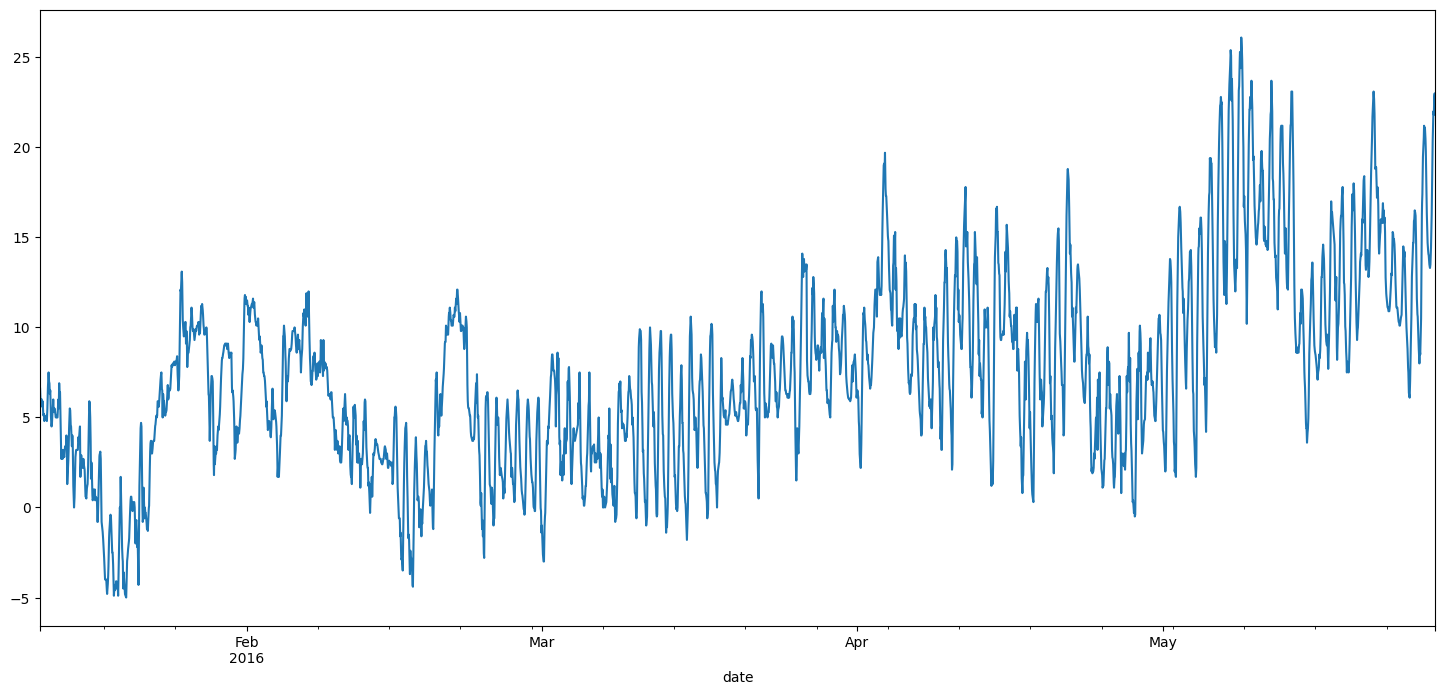

In [13]:
df.set_index('date')['T_out'].plot()

In [14]:
## aplliance useage increases very much as we move towards summer

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

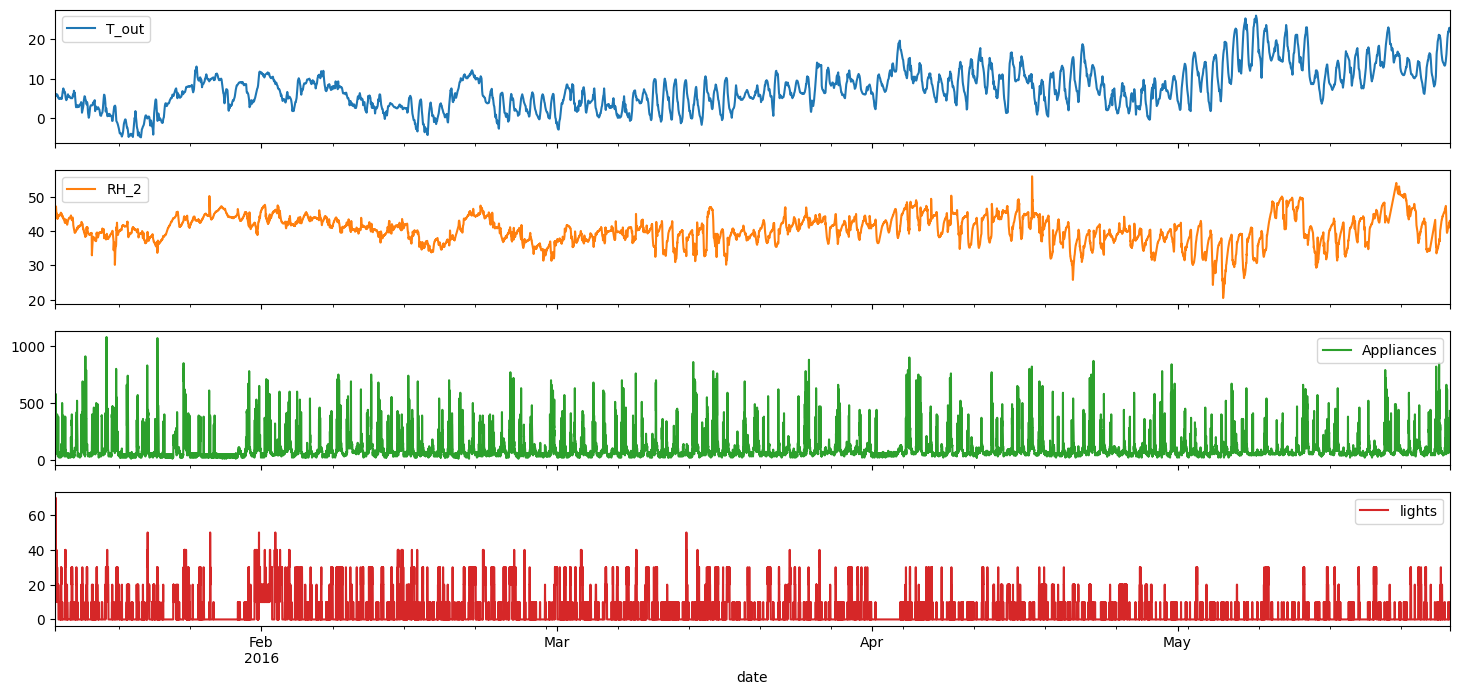

In [15]:
df.set_index('date')[['T_out','RH_2','Appliances','lights']].plot(subplots = True)

In [16]:
## during jan feb higher applainces useage

In [17]:
df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [18]:
features = df[['Appliances','T_out','RH_2']].to_numpy().tolist()

In [19]:
# features is list of list
target = df['Appliances'].to_numpy().tolist()

In [20]:
features[0:11]

[[60.0, 6.6, 44.79],
 [60.0, 6.48333333333333, 44.7225],
 [50.0, 6.36666666666667, 44.6266666666667],
 [50.0, 6.25, 44.59],
 [60.0, 6.133333333333329, 44.53],
 [50.0, 6.01666666666667, 44.5],
 [60.0, 5.9, 44.5],
 [60.0, 5.91666666666667, 44.5],
 [60.0, 5.93333333333333, 44.433333333333294],
 [70.0, 5.95, 44.4],
 [230.0, 5.96666666666667, 44.4]]

In [21]:
target[0:11]
## applaince energy usegae

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [22]:
ts_generator = TimeseriesGenerator(features,target, length = 6, sampling_rate= 1, batch_size = 1)
# sampling rate can be kept higher when we want to predict every 3rd value #2nd value
## batch_size kept higher when we want to train data o minibatches

In [23]:
ts_generator[0] #first batch

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [24]:
ts_generator[1]#second batch
# removed the first entry and took from second

(array([[[60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ]]]),
 array([60]))

In [25]:
len(ts_generator)

19729

In [26]:
## since we are using the sampling rate 1 
# size of generator would be total size - length (6) since label not there for last batch

In [27]:
ts_generator = TimeseriesGenerator(features, target,length = 6, sampling_rate= 1, batch_size = 1 , stride =2)

In [28]:
len(ts_generator)

9865

In [29]:
ts_generator[1]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([60]))

In [30]:
## suppose we want to predict next 3 
# gven 1,2,3,4,5,6 - > 7,8 9

In [31]:
## we are using features we had extracted earlier to get next 3 applances value 
## we make 3 features in a way one by shifting values down by 1 unit 
# another by shifting by 2unnits 
## so one row has 3 values:
## appliance value , appliance value on next day , applianvce value on next to next day

In [37]:
multi_target = pd.concat([df['Appliances'],df['Appliances'].shift(-1), df['Appliances'] .shift(-2)], axis= 1).dropna().to_numpy()

In [38]:
multi_target[0:13]

array([[ 60.,  60.,  50.],
       [ 60.,  50.,  50.],
       [ 50.,  50.,  60.],
       [ 50.,  60.,  50.],
       [ 60.,  50.,  60.],
       [ 50.,  60.,  60.],
       [ 60.,  60.,  60.],
       [ 60.,  60.,  70.],
       [ 60.,  70., 230.],
       [ 70., 230., 580.],
       [230., 580., 430.],
       [580., 430., 250.],
       [430., 250., 100.]])

In [39]:
## dropna would drop any rows in which any col has null value 

In [44]:
ts_generator= TimeseriesGenerator(features[:-2], multi_target,length = 6, sampling_rate =1 , batch_size =1 , stride = 6)

## removing last 2 since we did drop na
# stride =6 makes it hopping

In [45]:
features[0] # these 3 values and output would be /target would be the appliance useage of nect 3 days

[60.0, 6.6, 44.79]

In [46]:
len(features[:-2])

19733

In [48]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([[60., 60., 60.]]))

In [49]:
ts_generator[1]

(array([[[ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ],
         [580.        ,   5.98333333,  44.4       ]]]),
 array([[430., 250., 100.]]))